In [5]:
import os
import pandas as pd

import matplotlib.pyplot as plt

In [7]:
def show_cum_ret(ret, title=None):
    fig, ax = plt.subplots(figsize=(24,15))
    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = ret.shape[1]
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    (1+ret).cumprod().plot(ax=ax)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_yscale("log")
    if title is not None:
        ax.set_title(title)
    plt.show()

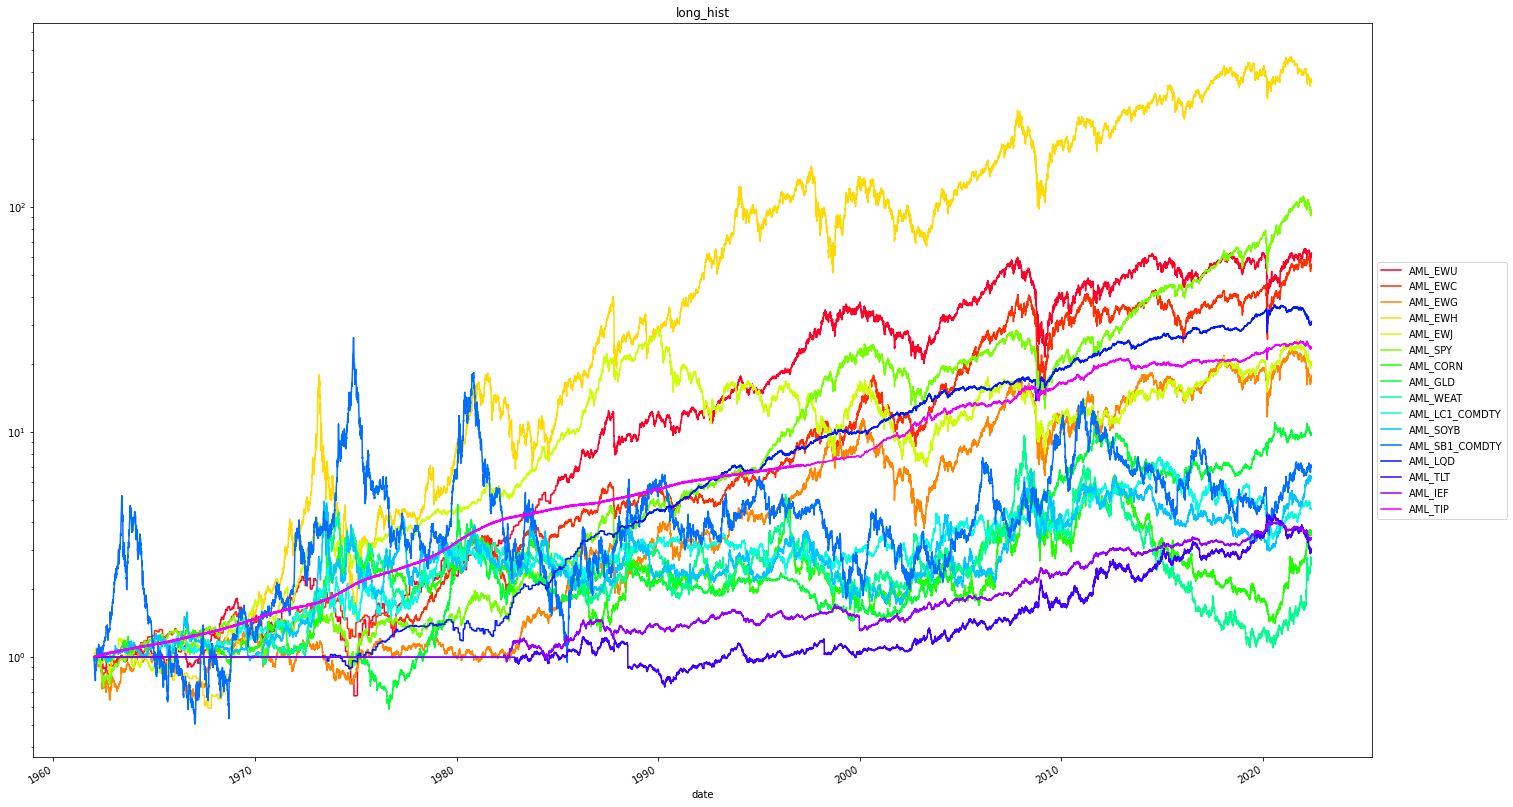

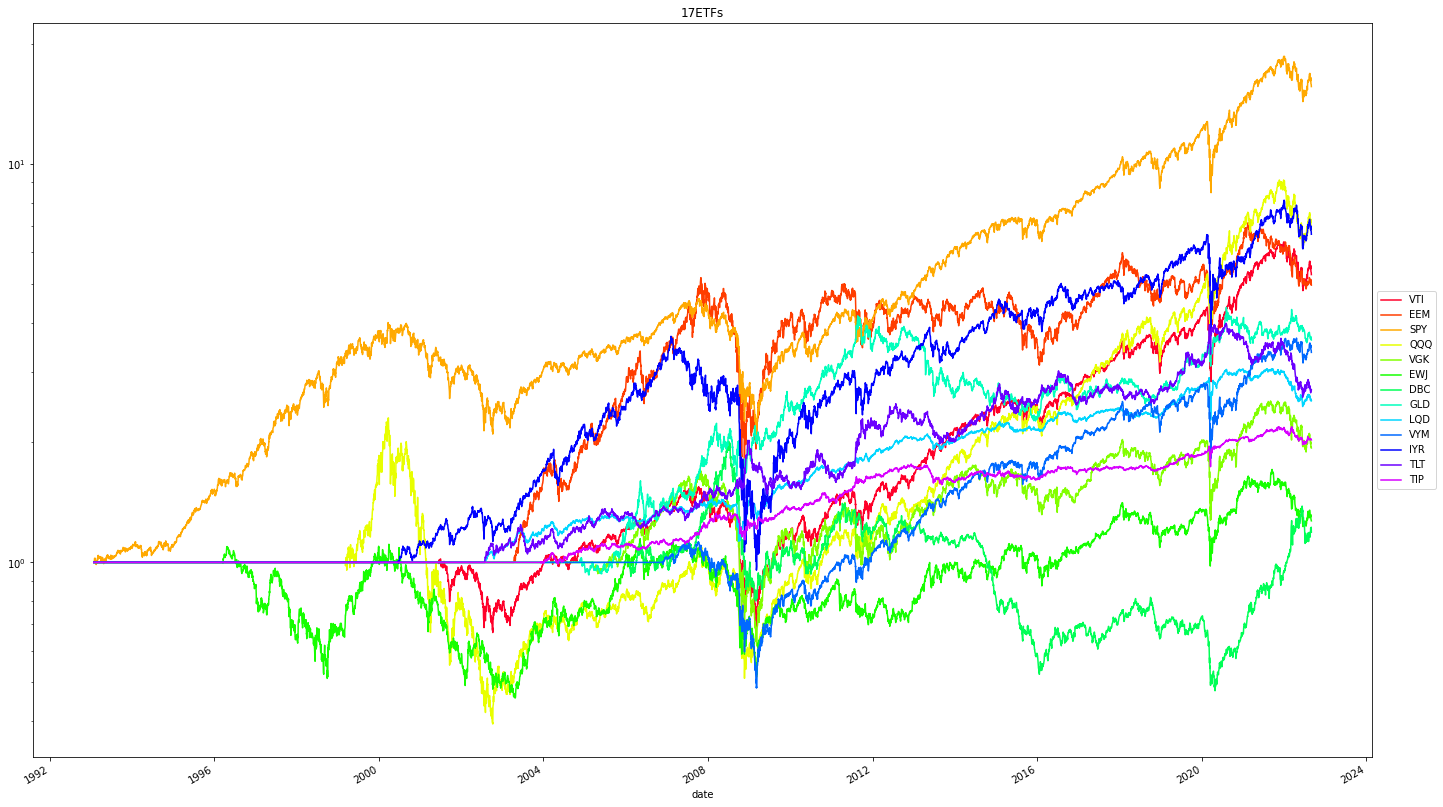

In [9]:
long_hist = [
    'AML_EWU', 'AML_EWC', 'AML_EWG', 'AML_EWH', 'AML_EWJ', 'AML_SPY', 
    'AML_CORN', 'AML_GLD', 'AML_WEAT', 'AML_LC1_COMDTY', 'AML_SOYB',
     'AML_SB1_COMDTY', 'AML_LQD', 'AML_TLT', 'AML_IEF', 'AML_TIP'
]

etf = [
    'VTI', 'EEM', 'SPY', 'QQQ', 'VGK', 'EWJ',
    'DBC', 'GLD', 'LQD', 'VYM', 'IYR', 'TLT', 'TIP'
]

file_dict = {
    'long_hist': ('./result/2022/cashON_signal/result/long_hist/backtest_AML_ETF_2000_202205.csv', long_hist), 
    '17ETFs': ('./data/backtest_etf_algo_corr_fsp_20220829.csv', etf),
}

# price = pd.DataFrame()
for case, (file_path, assets) in file_dict.items():
    price = pd.read_csv(file_path, index_col=0)
    price = price.pivot_table('adj_close', 'date', 'code')
    price.index = pd.to_datetime(price.index)
    price = price[assets]
    price_change = price.pct_change().fillna(0)

    show_cum_ret(price_change, case)

In [8]:
# file_dict = {
#     'xxz_2008': './data/MPT_KPI/pfrb_3030_xxz.xlsx',
#     'xzz_2008': './data/MPT_KPI/pfrb_3030_xzz.xlsx',
#     'zzz_2008': './data/MPT_KPI/pfrb_3030_zzz.xlsx',

#     'xxz_2000': './data/MPT_KPI/pfrb_3030xxz_2000.xlsx',
#     'xzz_2000': './data/MPT_KPI/pfrb_3030xzz_2000.xlsx',
#     'zzz_2000': './data/MPT_KPI/pfrb_3030zzz_2000.xlsx',
# }

In [ ]:
balance = pd.DataFrame()
for case, file_path in file_dict.items():
    # pf = case.split('_')[0]
    # yr = case.split('_')[1]
    print(case, ": ", file_path)
    excel_info = pd.read_excel(file_path, sheet_name='History', index_col=0)
    # print(excel_info.head())
    bal = excel_info['balance']
    if 'Unnamed 0' in bal.index:
        bal = bal.drop('Unnamed 0')
    bal.index = pd.to_datetime(bal.index)
    bal.name = tuple(case.split('_'))
    balance = pd.concat([balance, bal], axis=1)
balance.columns = pd.MultiIndex.from_tuples(balance.columns)
balance

In [11]:
ret = -balance.pct_change(-21).dropna()
y = (ret>=0).astype(int)

In [ ]:
balance

In [ ]:
ret